<a href="https://colab.research.google.com/github/Lgvalia/Vehicle-Similarity/blob/main/Main_notebook_Public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from IPython.display import display

In [5]:
image1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140449786.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140458136.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140647713.jpg')

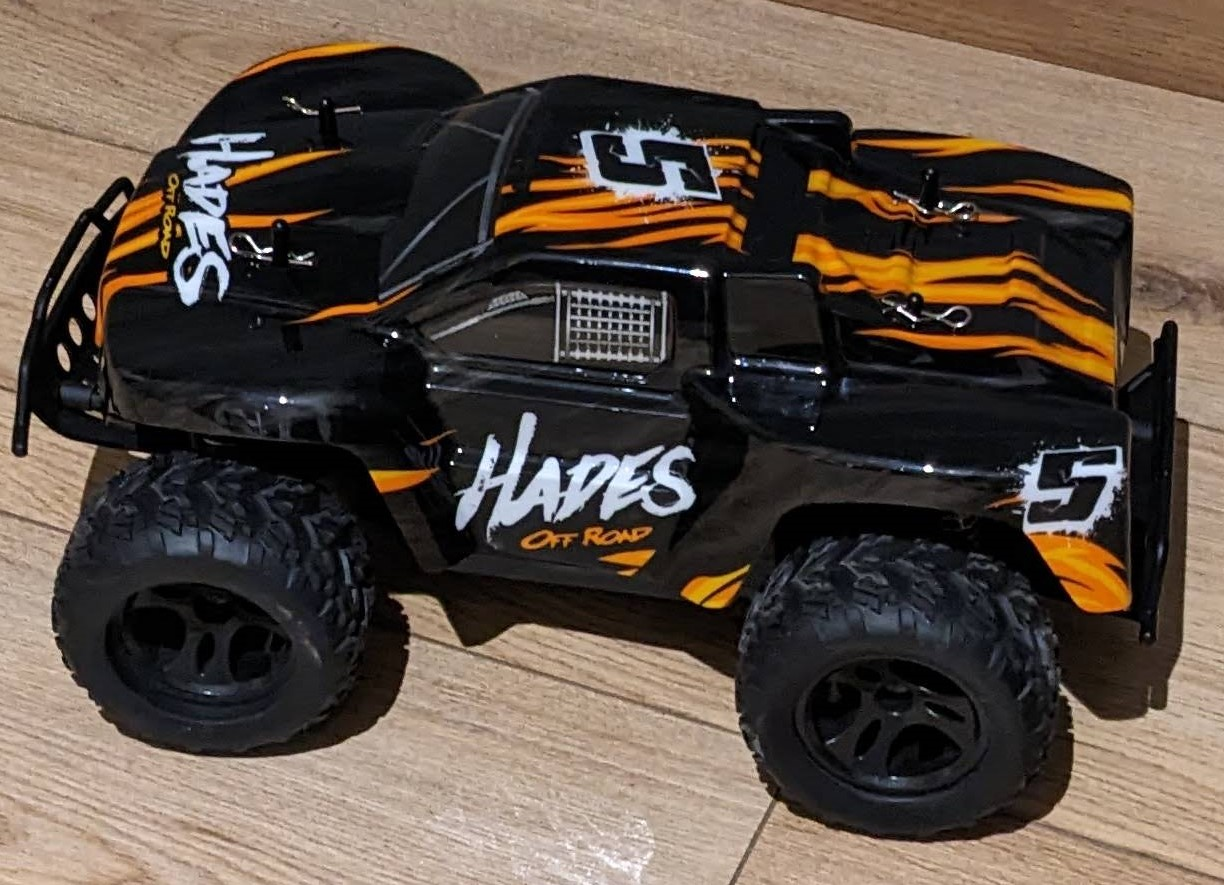

In [13]:
im = Image.open('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140449786.jpg')
im_cropped = im.crop((100, 100, 200, 200))
display(im)

In [9]:
def compute_sift_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    # surf = cv2.xfeatures2d.SURF_create()
    # freak = cv2.xfeatures2d.FREAK_create()

    # keypoints = freak.detect(gray, None)

    # Detect keypoints and compute their descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    # keypoints, descriptors = surf.detectAndCompute(gray, None)
    # keypoints, descriptors = freak.compute(gray, keypoints)

    return keypoints, descriptors

Images do not match


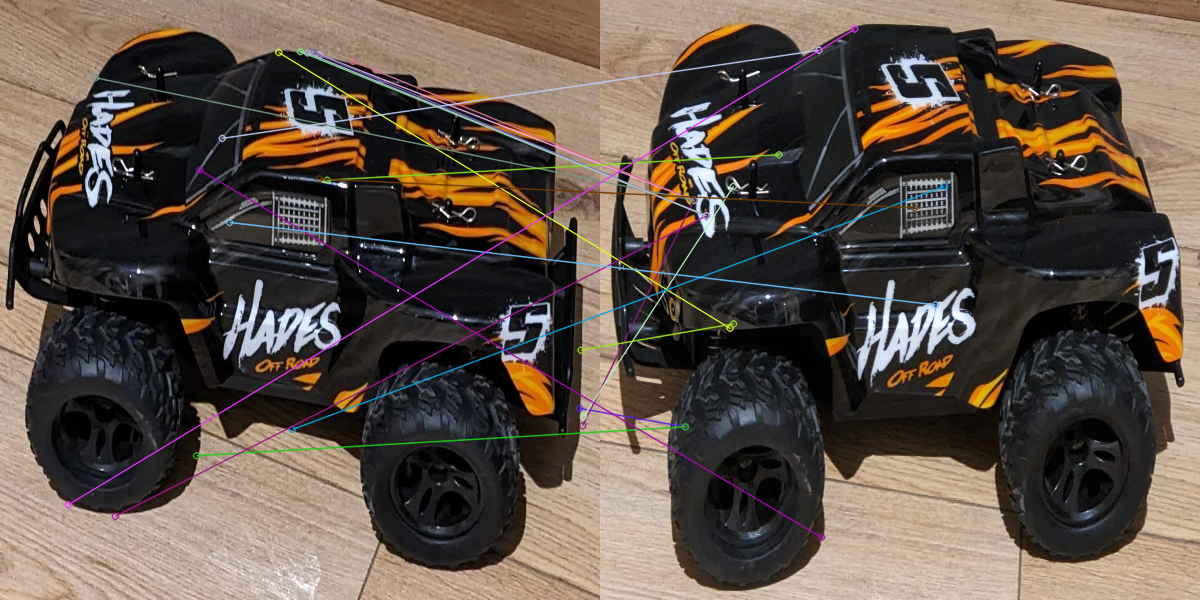

In [10]:
image1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140449786.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140458136.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140647713.jpg')

image1 = cv2.resize(image1, (600, 600))
image2 = cv2.resize(image2, (600, 600))
image3 = cv2.resize(image3, (600, 600))

keypoints1, descriptors1 = compute_sift_features(image1)
keypoints2, descriptors2 = compute_sift_features(image2)
keypoints3, descriptors3 = compute_sift_features(image3)

bf_matcher = cv2.BFMatcher()
matches = bf_matcher.match(descriptors1, descriptors3)
matches = sorted(matches, key=lambda x: x.distance)

N = 20
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:N],
                                image2.copy(), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


num_matches = sum([1 for m in matches if m.distance < 100])

if num_matches > 80:
    print('Images match')
else:
    print('Images do not match')

cv2_imshow(image_matches)

Images do not match


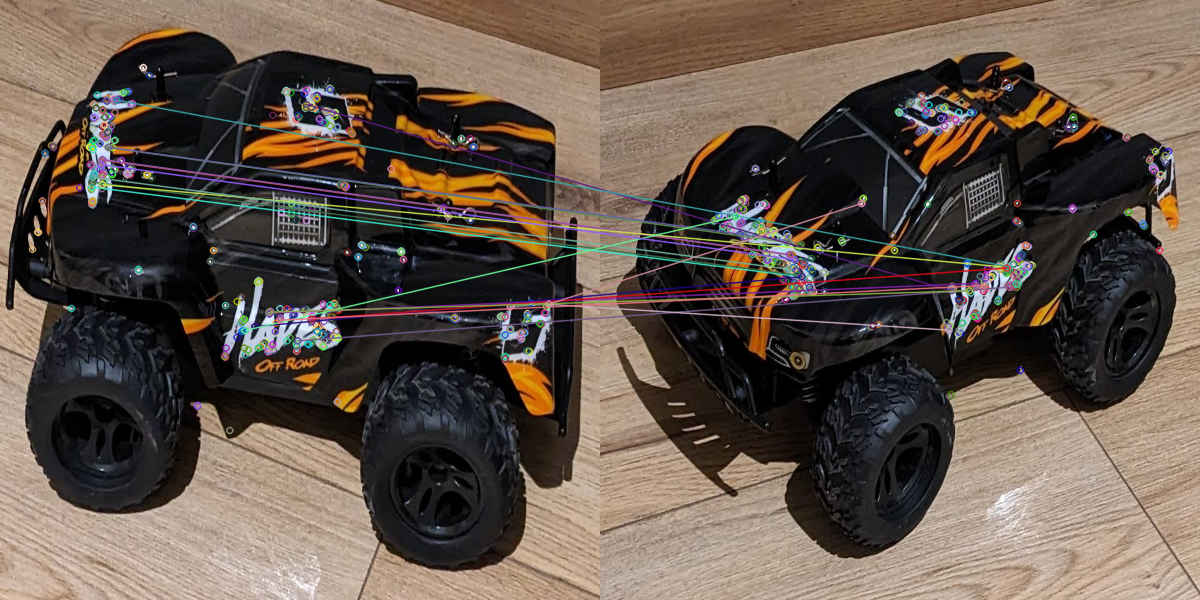

In [11]:
img1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140449786.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140506894.jpg')
img3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/E4A SIFT SURF/Photos-001/PXL_20230103_140647713.jpg')

img1 = cv2.resize(img1, (600, 600))
img2 = cv2.resize(img2, (600, 600))
img3 = cv2.resize(img3, (600, 600))

orb = cv2.ORB_create(nfeatures=500)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None)

num_matches = sum([1 for m in matches if m.distance < 100])

if num_matches > 250:
    print('Images match')
else:
    print('Images do not match')

cv2_imshow(match_img)